<a href="https://colab.research.google.com/github/Ibrahim-Mohamed111/image-classification-/blob/main/image%20classification%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers
import matplotlib.image as mpimg
import math

import os

In [ ]:
BASE_DIR = '/content/drive/MyDrive/artifacts/project'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
BATCH_SIZE = 32
EPOCHS = 20

#ImageDataGenerator for training data
TRAIN_DATAGEN = ImageDataGenerator(
                rescale = 1.0/255,
                validation_split = 0.2
                )

#ImageDataGenerator for testing data
TEST_DATAGEN = ImageDataGenerator(
                rescale = 1.0/255
                )

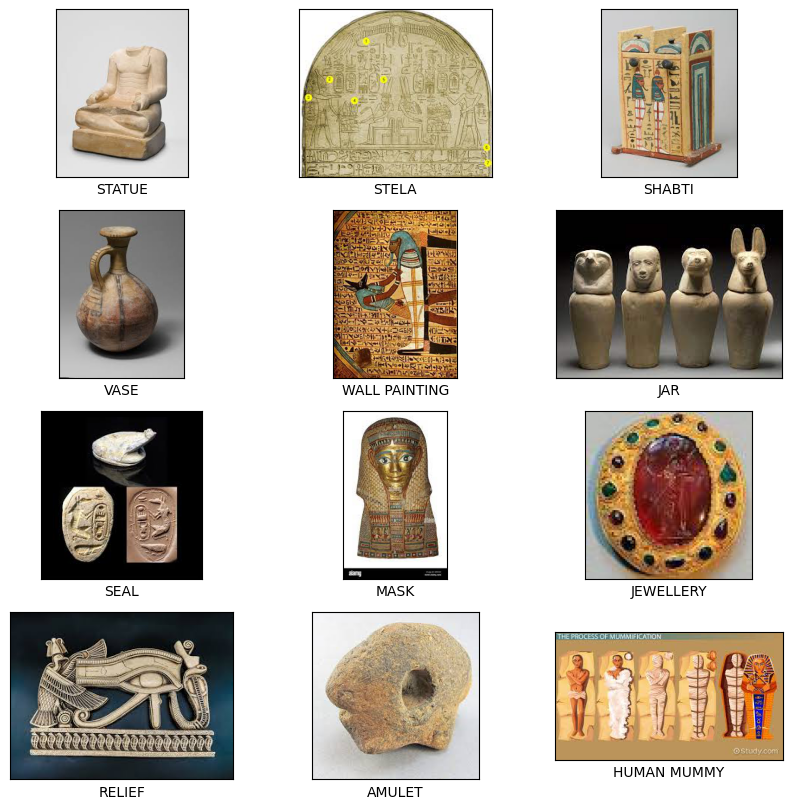

In [ ]:
j=0
fig=plt.figure(figsize=(10, 10))
for i in os.listdir(TRAIN_DIR):
        img = mpimg.imread(TRAIN_DIR+"/"+i+"/"+os.listdir(TRAIN_DIR+"/"+i)[0])
        fig.add_subplot(4,3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.xlabel(i)
        j += 1
plt.show()


In [ ]:
print("TRAINING DATA:")
for i in os.listdir(TRAIN_DIR):
    files = os.listdir(TRAIN_DIR+"/"+i)
    print(f'{i} : {len(files)} files')

print("\n\nTEST DATA:")
for i in os.listdir(TEST_DIR):
    files = os.listdir(TEST_DIR+"/"+i)
    print(f'{i} : {len(files)} files')

TRAINING DATA:
STATUE : 156 files
STELA : 171 files
SHABTI : 183 files
VASE : 115 files
WALL PAINTING : 110 files
JAR : 197 files
SEAL : 153 files
MASK : 103 files
JEWELLERY : 192 files
RELIEF : 144 files
AMULET : 133 files
HUMAN MUMMY : 167 files


TEST DATA:
STELA : 48 files
WALL PAINTING : 28 files
VASE : 27 files
MASK : 29 files
SHABTI : 40 files
SEAL : 30 files
RELIEF : 44 files
STATUE : 43 files
JAR : 47 files
JEWELLERY : 40 files
HUMAN MUMMY : 43 files
AMULET : 32 files


In [ ]:
train_generator = TRAIN_DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (224,224),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset='training'
                  )

validation_generator = TRAIN_DATAGEN.flow_from_directory(
                    TRAIN_DIR,
                    target_size = (224,224),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical',
                    subset='validation'
                  )

test_generator = TEST_DATAGEN.flow_from_directory(
                    TEST_DIR,
                    target_size = (224,224),
                    batch_size = BATCH_SIZE,
                    class_mode = 'categorical'
                  )

Found 1464 images belonging to 12 classes.
Found 360 images belonging to 12 classes.
Found 451 images belonging to 12 classes.


In [ ]:
train_generator.class_indices


{'AMULET': 0,
 'HUMAN MUMMY': 1,
 'JAR': 2,
 'JEWELLERY': 3,
 'MASK': 4,
 'RELIEF': 5,
 'SEAL': 6,
 'SHABTI': 7,
 'STATUE': 8,
 'STELA': 9,
 'VASE': 10,
 'WALL PAINTING': 11}

In [ ]:
idx_to_class = {val:key for key, val in dict(train_generator.class_indices).items()}
idx_to_class

{0: 'AMULET',
 1: 'HUMAN MUMMY',
 2: 'JAR',
 3: 'JEWELLERY',
 4: 'MASK',
 5: 'RELIEF',
 6: 'SEAL',
 7: 'SHABTI',
 8: 'STATUE',
 9: 'STELA',
 10: 'VASE',
 11: 'WALL PAINTING'}

In [ ]:
conv_base = VGG16(
                    weights = 'imagenet',
                    include_top = False,
                    input_shape = (224,224,3)
                 )

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Nadam(learning_rate=2e-5), metrics=['acc'])


In [ ]:
history = model.fit(
                                train_generator,
                                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                                epochs = EPOCHS,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                             )

Epoch 1/20
45/45 [==============================] - 909s 20s/step - loss: 2.2917 - acc: 0.2277 - val_loss: 1.5113 - val_acc: 0.5511
Epoch 2/20
45/45 [==============================] - 47s 1s/step - loss: 1.4115 - acc: 0.5461 - val_loss: 1.0448 - val_acc: 0.7131
Epoch 3/20
45/45 [==============================] - 47s 1s/step - loss: 0.9233 - acc: 0.7165 - val_loss: 0.8331 - val_acc: 0.7869
Epoch 4/20
45/45 [==============================] - 45s 1s/step - loss: 0.6697 - acc: 0.7954 - val_loss: 0.6549 - val_acc: 0.8125
Epoch 5/20
45/45 [==============================] - 46s 1s/step - loss: 0.4269 - acc: 0.8603 - val_loss: 0.5495 - val_acc: 0.8466
Epoch 6/20
45/45 [==============================] - 46s 1s/step - loss: 0.3302 - acc: 0.8918 - val_loss: 0.5169 - val_acc: 0.8608
Epoch 7/20
45/45 [==============================] - 47s 1s/step - loss: 0.2776 - acc: 0.9190 - val_loss: 0.4600 - val_acc: 0.8636
Epoch 8/20
45/45 [==============================] - 47s 1s/step - loss: 0.2397 - acc: 0.

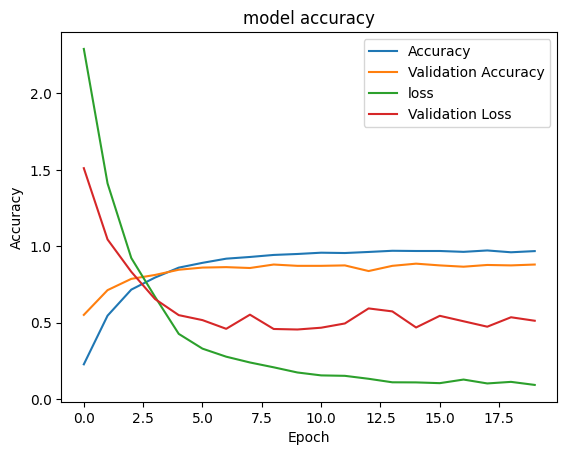

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved model/model33.h5')

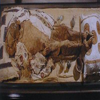

TypeError: ignored

In [ ]:
from PIL import Image
import keras.utils as image
img = Image.open('/content/drive/MyDrive/data project/final images/4/4.jpg')
display(img.resize((100,100)))
img = img.resize((224, 224))
img_array = np.array(img)
img_array = img_array[np.newaxis, :]
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/saved model/model33.h5")
prob = saved_model(img_array)
pred = np.argmax(prob)
print(pred)
dic = { 0: 'AMULET',
        1: 'HUMAN MUMMY',
        2: 'JAR',
        3: 'JEWELLERY',
        4: 'MASK',
        5: 'RELIEF',
        6: 'SEAL',
        7: 'SHABTI',
        8: 'STATUE',
        9: 'STELA',
        10: 'VASE',
        11: 'WALL PAINTING'}
print(dic[pred])

In [ ]:
#  !pip install flask
#  !pip install gevent
#  !pip install utils
import os
import sys
import base64

# Flask
from flask import Flask, redirect, url_for, request, render_template, Response, jsonify, redirect
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Some utilites
import numpy as np
# from util import base64_to_pil


# Declare a flask app
app = Flask(__name__)


# You can use pretrained model from Keras
# Check https://keras.io/applications/
# or https://www.tensorflow.org/api_docs/python/tf/keras/applications

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
model = MobileNetV2(weights='imagenet')

print('Model loaded. Check http://127.0.0.1:5000/')


# Model saved with Keras model.save()
MODEL_PATH = '/content/drive/MyDrive/saved model/model33.h5'

# Load your own trained model
# model = load_model(MODEL_PATH)
# model._make_predict_function()          # Necessary
# print('Model loaded. Start serving...')


def model_predict(img, model):
    img = img.resize((224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    x = np.expand_dims(x, axis=0)

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x, mode='tf')

    preds = model.predict(x)
    return preds


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        # Get the image from post request
        img = base64_to_pil(request.json)

        # Save the image to ./uploads
        # img.save("./uploads/image.png")

        # Make prediction
        preds = model_predict(img, model)

        # Process your result for human
        pred_proba = "{:.3f}".format(np.amax(preds))    # Max probability
        pred_class = decode_predictions(preds, top=1)   # ImageNet Decode

        result = str(pred_class[0][0][1])               # Convert to string
        result = result.replace('_', ' ').capitalize()

        # Serialize the result, you can add additional fields
        return jsonify(result=result, probability=pred_proba)

    return None

if __name__ == '__main__':
    # app.run(port=5002, threaded=False)

    # Serve the app with gevent
    http_server = WSGIServer(('0.0.0.0', 5000), app)
    http_server.serve_forever()

14536120/14536120 [==============================] - 1s 0us/step
Model loaded. Check http://127.0.0.1:5000/


KeyboardInterrupt
2023-06-19T13:33:08Z


KeyboardInterrupt: ignored

In [ ]:
#  !pip install fastapi
#  !pip install uvicorn
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    path = '/content/drive/MyDrive/saved model/'
    # model = pickle.load(open(path + "model33.h5",encoding="utf8", errors='ignore'))
    with open(path + "model33.h5", 'rb') as f:
       model = f.read()

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def predict(filename , model):
    img = load_img(filename , target_size = (100 , 100))
    display(img.resize((100,100)))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array[np.newaxis, :]
    prob = model(img_array)
    pred = np.argmax(prob)
    dic = { 0: 'AMULET',
            1: 'HUMAN MUMMY',
            2: 'JAR',
            3: 'JEWELLERY',
            4: 'MASK',
            5: 'RELIEF',
            6: 'SEAL',
            7: 'SHABTI',
            8: 'STATUE',
            9: 'STELA',
            10: 'VASE',
            11: 'WALL PAINTING'}
    return pred , dic[pred]

In [ ]:
#  !pip install ColabCode
from colabcode import ColabCode
server = ColabCode(port=8000, code=False)
server.run_app(app=app)

Public URL: NgrokTunnel: "https://cc86-34-147-20-218.ngrok.io" -> "http://localhost:8000"


INFO:     Started server process [676]
INFO:uvicorn.error:Started server process [676]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     156.221.15.92:0 - "GET / HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:uvicorn.error:Shutting down
INFO:     Waiting for application shutdown.
INFO:uvicorn.error:Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:uvicorn.error:Application shutdown complete.
INFO:     Finished server process [676]
INFO:uvicorn.error:Finished server process [676]
